1. Загрузите файл HR.csv в pandas dataframe.

In [ ]:
import pandas as pd
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
hr = pd.read_csv(path)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).


In [ ]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [ ]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


3. Рассчитать и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.


In [ ]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


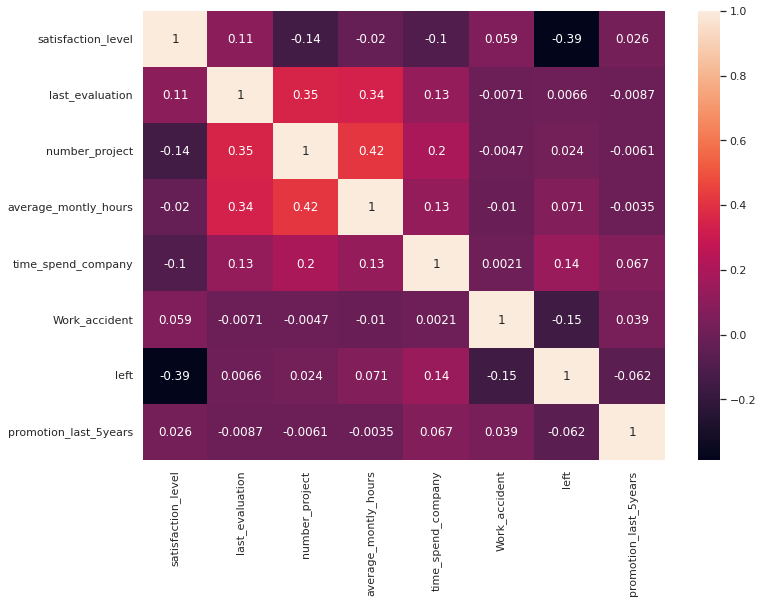

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(hr.corr(), annot=True)

Самые скоррелированные пары: average_monthly_hours и number_project, number_project и last_evaluation

Наименее скоррелированные: left и satisfaction_level, left и work_accident

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [ ]:
hr.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам.

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

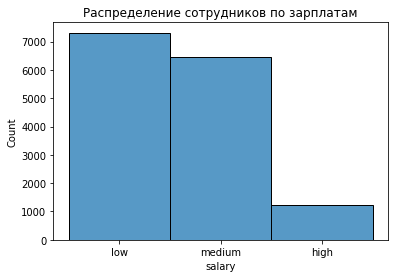

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(hr['salary'])
plt.title('Распределение сотрудников по зарплатам')

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:

hr_dep_salary = hr.groupby(['department', 'salary'])['salary'].count()
hr_dep_salary

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

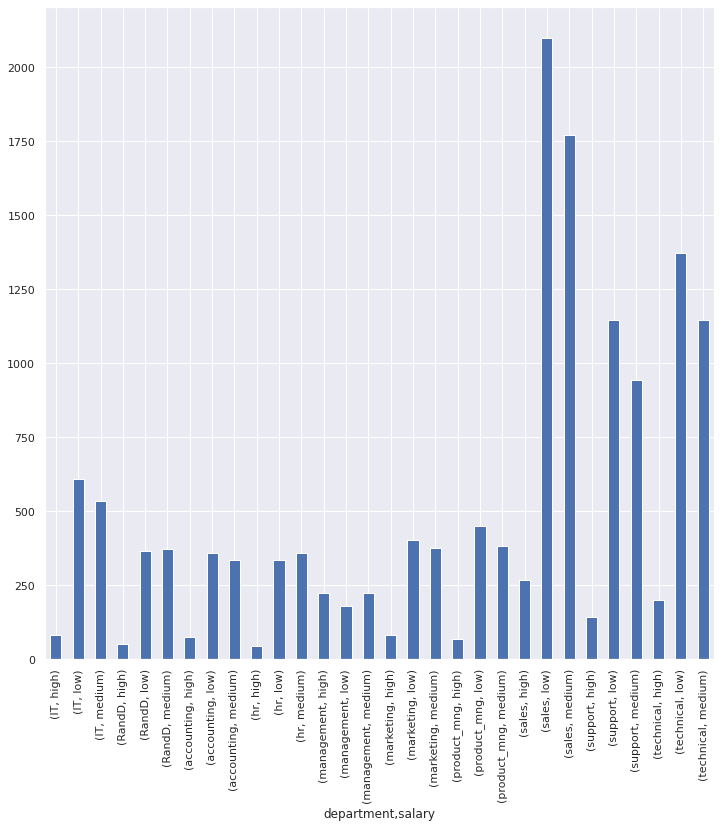

In [ ]:
hr_dep_salary.plot(kind='bar', figsize=(12,12))

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
hr_high_salary = hr[hr['salary'] == 'high']
hr_low_salary = hr[hr['salary'] == 'low']


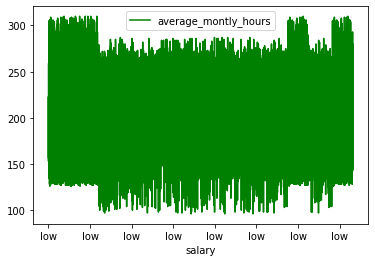

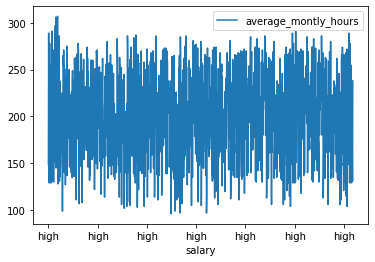

In [ ]:
hr_low_salary.plot(x='salary', y='average_montly_hours', color='g')
hr_high_salary.plot(x='salary', y='average_montly_hours')

Судя по графикам особой разницы нет.

In [ ]:
hr_high_salary = list(hr[hr['salary'] == 'high']['average_montly_hours'])
hr_low_salary = list(hr[hr['salary'] == 'low']['average_montly_hours'])


In [ ]:
from scipy.stats import ttest_ind
import  scipy.stats  as  stats
t, p = stats.ttest_ind(hr_high_salary, hr_low_salary)
print(t, p)

-0.7288680398062308 0.4661023478267259


При уровне значимости 0,05 значение p больше, поэтому гипотеза не верна, уровень зарплаты не связан с рабочим временем.

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов


In [ ]:
# выделим уволенных сотрудников
hr_left = hr.loc[hr['left'] == 1]
hr_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
print(f"Доля сотрудников с повышением за последние 5 лет равна {round(len(hr_left.loc[hr['promotion_last_5years'] == 1]) / len(hr_left), 3)}")

Доля сотрудников с повышением за последние 5 лет равна 0.005


In [ ]:
print(f"Средняя степень удовлетворенности равна {round(hr_left['satisfaction_level'].mean(), 2)}")

Средняя степень удовлетворенности равна 0.44


In [ ]:
print(f"Среднее количество проектов равно {round(hr_left['number_project'].mean(), 2)}")

Среднее количество проектов равно 3.79


In [ ]:
#выделим неуволенных сотрудников
hr_noleft = hr.loc[hr['left'] == 0]
hr_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:
print(f"Доля сотрудников с повышением за последние 5 лет равна {round(len(hr_noleft.loc[hr['promotion_last_5years'] == 1]) / len(hr_noleft), 3)}")

Доля сотрудников с повышением за последние 5 лет равна 0.026


In [ ]:
print(f"Средняя степень удовлетворенности равна {round(hr_noleft['satisfaction_level'].mean(), 2)}")

Средняя степень удовлетворенности равна 0.67


In [ ]:
print(f"Среднее количество проектов равно {round(hr_noleft['number_project'].mean(), 2)}")

Среднее количество проектов равно 3.79


Можно сделать вывод, что неуволенные сотрудники больше удовлетворены работой, их чаще повышают, чем уволенных сотрудников, однако это никак не сказывается на количестве проектов.



9. Разделить данные на тестовую и обучающую выборки.

   Построить модель LDA, предсказывающую уволился ли сотрудник на основе      имеющихся факторов (кроме department и salary).

   Оценить качество модели на тестовой выборки

In [ ]:
left = pd.array(hr['left'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hr[['Work_accident','satisfaction_level',
                                                       'last_evaluation', 'number_project',
                                                       'average_montly_hours', 'time_spend_company',
                                                       'left','promotion_last_5years']], left, test_size=0.25)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
3745,0,0
3746,0,0
3747,1,0
3748,1,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7554666666666666

Судя по оценке точности прогноза, можно сделать вывод, что на увольнение влияют не только эти признаки.